# 数据表示总结
深度学习存储和操作数据的主要接口是张量（n维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。

In [77]:
import torch
x = torch.arange(12)
y = torch.arange(0,5,0.1)
n_train = 50  # 训练样本数
x_train= torch.sort(torch.rand(n_train)*5)   # 排序后的训练样本
y_train,_= torch.sort(torch.rand(n_train)*5)   # 排序后的训练样本
# 为什么x_train和y_train不同？y_train后面的,_是什么用法？
#  _是一个占位符，表示不需要这个值，但是需要占位，否则会报错

x,y, x_train, y_train

# torch.xxx来赋值都是一个tensor
# x = torch.arange(12) //输入范围
# torch.ones/zeros/randn()// 输入维度
# torch.tensor([])//输入具体数值/python列表
# 每个tensor，也有自己的方法。reshape, shape，numel之类
# tensor之间，也可以按照元素来进行加减乘除/平方/求幂之类的运算。

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
         1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
         2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
         3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
         4.5000, 4.6000, 4.7000, 4.8000, 4.9000]),
 torch.return_types.sort(
 values=tensor([0.0312, 0.3327, 0.3450, 0.6332, 0.6561, 0.6762, 0.8970, 1.1050, 1.1958,
         1.2029, 1.3604, 1.5666, 1.7388, 1.7557, 1.7642, 1.8252, 1.8283, 1.8693,
         2.0594, 2.0691, 2.0864, 2.1265, 2.4785, 2.5887, 2.6014, 2.6035, 2.7072,
         2.7536, 2.7881, 2.8083, 3.0951, 3.2491, 3.3284, 3.4669, 3.5274, 3.5744,
         3.6498, 3.6524, 3.9045, 3.9410, 3.9782, 4.1387, 4.2345, 4.2829, 4.3259,
         4.4919, 4.5255, 4.6256, 4.8803, 4.9936

In [78]:
x.shape

torch.Size([12])

获取张量tensor中的元素个数，number element。一维时与shape一样

In [79]:
x.numel()

12

In [80]:
x = x.reshape(2,6)
x

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

reshape时候，行/列只用指定一个。因为知道总数，另一个可以自动算出来。
**不指定的那个要填上-1**

In [81]:
#等价于如上
x = x.reshape(-1,6)
x


tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [82]:
x = x.reshape(2,-1)
x

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [83]:

#一个方括号一个维度，看第一个方括号到邻近的最后一个方括号有几个，就是几维
#如下，最外层的方括号，表示2个内层的
#次一层的表示3个内层的
#再次一层表示4个内层的
torch.zeros(2,3,4) ,torch.zeros((2,3,4))

#这两种写法一样

(tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]),
 tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]))

In [84]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [85]:
torch.randn(3,4)
#取随机值，应该时默认符合标准正态分布
#标准正态分布又称为u分布，是以0为均值、以1为标准差的正态分布，  记为N（0，1）。

tensor([[-0.7024,  0.2065, -0.4582, -0.0308],
        [ 0.2086,  1.9039, -0.4320,  0.5849],
        [ 0.9331, -0.8656, -0.4887,  0.0512]])

In [86]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
#用python的列表来赋值

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [87]:
# 按元素操作
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y, x - y, x * y, x / y,x **y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [88]:
# 按元素操作，还包括，求幂
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [89]:
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
#dim=0,按行拼接（默认），=1，按列拼接
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [90]:
# 判断两个张量，可以得到布尔值的结果，相同为True，不用为False
X==Y
#下面结果显示，x与y只有两个相同

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [91]:
#对张量所有元素进行求和
X.sum()

tensor(66.)

In [92]:
a = torch.arange(3).reshape(3,1)
b = torch.arange(3).reshape(1,3)
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1, 2]]))

In [93]:
# 广播机制，不同类型的矩阵相加，扩成同型矩阵
a+b

tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]])

In [94]:
# 切片和索引，切片就是另一种选取元素的方式
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
X,X[-1],X[1:3]
#-1选最后一个元素，因为是二维的，所以一个元素就是一个向量
#1:3选第二个和第三个元素
#感觉是不加 , 逗号 ，就默认是第一个维度，这里就是默认行

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [95]:
# 可对单个元素赋值
# 对第2行第3列的元素进行赋值
X[1,2]=99
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 99.,  7.],
        [ 8.,  9., 10., 11.]])

In [96]:
# 选中多行 多列可批量赋值
# 如下选中第一行和第二行，0：2,不包括第三行，相当于右边开区间
# 逗号分隔一个维度，逗号后面， ： ,此符号表示所有列
X[0:2,:]=77
X

tensor([[77., 77., 77., 77.],
        [77., 77., 77., 77.],
        [ 8.,  9., 10., 11.]])

In [97]:
# 节省点内存
# 因为深度学习跑模型每秒运算太大了，或许还有别的引用指向原内存

#起因
#因为python中如下写运算，Y会重新得到个内存
#id()，来获取y的地址
y=1
x=2
before=id(Y)
Y=X+Y
id(Y)==before
#会输出false，说明地址变了

False

In [98]:
#向下面这样写就不会变
before=id(Y)
Y[:]=X+Y
id(Y)==before

True

In [99]:
#这样也行
Y+=X
id(Y)==before

True

In [100]:
# 创建一个相似结构的tensor
# _like 表示和Y结构一样
# zeros表示元素为0
Z=torch.zeros_like(Y)
Z

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [101]:
#pytorch的张量(tensor)转换为Numpy的张量(ndarry),很容易，反之也很容易
#如下，将ndarry->tensor
A = X.numpy()
B = torch.tensor(A)
type(A),type(B),A,B,B[:,2]
# 切片表示具体某一列时，是直接按索引号来的
# 所以B[:,2]取最后一列


(numpy.ndarray,
 torch.Tensor,
 array([[77., 77., 77., 77.],
        [77., 77., 77., 77.],
        [ 8.,  9., 10., 11.]], dtype=float32),
 tensor([[77., 77., 77., 77.],
         [77., 77., 77., 77.],
         [ 8.,  9., 10., 11.]]),
 tensor([77., 77., 10.]))

In [102]:
# 将大小为1的张量转换为python的标量
a = torch.tensor([3.5])
# a.item(),将a转为标量 , 后面两个就用的python的强转
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

#### numpy矩阵运算（求逆、行列式值、特征向量特征值、求解线性方程组）


In [103]:
import numpy as np
A=np.array([
    [3,4],
    [1,2]
])
#求逆矩阵
a=np.linalg.inv(A)
a

array([[ 1. , -2. ],
       [-0.5,  1.5]])

In [104]:
# 求行列式
a=np.linalg.det(A)
a

2.0000000000000004

In [105]:
#求特征值和特征向量
a=np.linalg.eig(A)
a

(array([4.56155281, 0.43844719]),
 array([[ 0.93153209, -0.84212294],
        [ 0.36365914,  0.5392856 ]]))

In [106]:
#线性方程组Ax=B求解
B=np.array([9,8])
x=np.linalg.solve(A,B)
x

array([-7. ,  7.5])

In [107]:
#矩阵转置
A,A.T

(array([[3, 4],
        [1, 2]]),
 array([[3, 1],
        [4, 2]]))

### help文档使用

In [108]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

In [109]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

### 数据预处理：生成csv文件，pandas读取cvs，并且利用pandas进行数据预处理

In [120]:
import os
data_file = os.path.join('.','house_tiny.csv')
with open(data_file,"w") as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [121]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [122]:
# 切片表示具体某一列时，是直接按索引号来的
# 所以data.iloc[:, 3]取索引为3的列

# cvs拆成两个部分，输入和输出
inputs, outputs = data.iloc[:,0:2] ,data.iloc[:,2]
# 是Nan的补上改列均值
inputs = inputs.fillna(inputs.mean(numeric_only=True))
print(inputs.mean(numeric_only=True))
print("==============================")
print(inputs)
print("==============================")
print(outputs)

NumRooms    3.0
dtype: float64
   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


In [123]:
help(inputs.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value: 'Hashable | Mapping | Series | DataFrame' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit: 'int | None' = None, downcast: 'dict | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series:
    
        * ffill: propagate last valid observation forward to next valid.
        * backfill / b

In [124]:
# numpy可以根据某一列的值是否是NaN,来拆分成两列
# 即pd.get_dummies 可以将非数值的列，拆成多列，每一列代表一个值
inputs = pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


数值类型转换为张量

In [127]:
import torch

# 转成float
inputs = inputs.astype(float)
outputs = outputs.astype(float)

# torch.tensor输入不能是对象，不知道为啥这里报错是对象， 转成float就可以了
# 原ipynb没问题
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

实例化一个矩阵

In [141]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

转置

In [142]:
A.T

tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]])

### 张量：就是多个矩阵 、 矩阵的的更高维度的推广

就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构

In [143]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [144]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone()# 通过分配新内存，将A的一个副本分配给B
A , A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为Hadamard积（Hadamard product）（数学符号 ⊙
 ）

In [145]:
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [147]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, a * X

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]))

求和

In [149]:
x = torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [151]:
A.shape,A.sum(),A

(torch.Size([5, 4]),
 tensor(190.),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

axis=几，就是**去掉**这个轴，其它轴求和

如下axis=0就是不按0轴求和，按1轴求和

如果是多维，也可以指定多维度

In [152]:
# A.sum(axis=0)  axis=0按列求和，输出一个列表表示每一列的和
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [153]:
# A.sum(axis=1)  axis=1按行求和，输出一个列表表示每一行的和
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

加上keepdims=True，则会保留去掉的这个维度，后面也常用

可以看到加上后，还是三个[[[]]]

In [214]:
a = torch.ones((2,5,4))

a_sum_axis0 = a.sum(axis=[0,2])

a_sum_axis0_T = a.sum(axis=[0,2],keepdims=True)

a_sum_axis0 , a_sum_axis0.shape,a_sum_axis0_T , a_sum_axis0_T.shape

(tensor([8., 8., 8., 8., 8.]),
 torch.Size([5]),
 tensor([[[8.],
          [8.],
          [8.],
          [8.],
          [8.]]]),
 torch.Size([1, 5, 1]))

平均值

In [154]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

也可以沿指定轴

In [155]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 向量
向量点积

- 点乘： $a^Tb=\sum_{i} a_ib_i$
- 正交： $a^Tb=\sum_{i} a_ib_i=0$ —> 垂直点积为0
  - eg: a=[0,1] b=[1,0]
  - $\sum_{i} a_ib_i=0*1+1*0=0$

### 矩阵-向量积
`torch.mv(A,x)`

$\text { 矩阵向量积 } \mathbf{A x} \text { 得到的是一个长度为 } m \text { 的列向量, 其 } i^{\mathrm{th}} \text { 元素是点积 } \mathbf{a}_{i}^{\top} \mathbf{x}$

矩阵A的每个行向量和向量x点积，返回结果为每行的点积组成的列表/向量

可以求解神经网络每一层所需的复杂计算

也可以用方阵的乘法来表示旋转

In [158]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
x = torch.arange(4,dtype=torch.float32)
A,A.shape ,x,x.shape ,torch.mv(A,x)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor([0., 1., 2., 3.]),
 torch.Size([4]),
 tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法

`torch.mm(A,B)`




In [162]:
B =torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## 范数

线性代数中最有用的一些运算符是*范数*（norm）。
非正式地说，向量的*范数*是表示一个向量有多大。
这里考虑的*大小*（size）概念不涉及维度，而是分量的大小。

在线性代数中，向量范数是将向量映射到标量的函数$f$。
给定任意向量$\mathbf{x}$，向量范数要满足一些属性。
第一个性质是：如果我们按常数因子$\alpha$缩放向量的所有元素，
其范数也会按相同常数因子的*绝对值*缩放：

$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$

第二个性质是熟悉的三角不等式:

$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$

第三个性质简单地说范数必须是非负的:

$$f(\mathbf{x}) \geq 0.$$

这是有道理的。因为在大多数情况下，任何东西的最小的*大小*是0。
最后一个性质要求范数最小为0，当且仅当向量全由0组成。

$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$

范数听起来很像距离的度量。
欧几里得距离和毕达哥拉斯定理中的非负性概念和三角不等式可能会给出一些启发。
事实上，欧几里得距离是一个$L_2$范数：
假设$n$维向量$\mathbf{x}$中的元素是$x_1,\ldots,x_n$，其[**$L_2$*范数*是向量元素平方和的平方根：**]

(**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**)

其中，在$L_2$范数中常常省略下标$2$，也就是说$\|\mathbf{x}\|$等同于$\|\mathbf{x}\|_2$。
在代码中，我们可以按如下方式计算向量的$L_2$范数。

`torch.norm(u)`

In [164]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

### L1范数

`torch.abs(u).sum()`

深度学习中更经常地使用$L_2$范数的平方，也会经常遇到[**$L_1$范数，它表示为向量元素的绝对值之和：**]

(**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**)

与$L_2$范数相比，$L_1$范数受异常值的影响较小。
为了计算$L_1$范数，我们将绝对值函数和按元素求和组合起来。

In [165]:
torch.abs(u).sum()

tensor(7.)

$L_2$范数和$L_1$范数都是更一般的$L_p$范数的特例：

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$

线性代数的其他应用

矩阵可以分解为因子，这些分解可以显示真实世界数据集中的低维结构

机器学习的整个子领域都侧重于使用矩阵分解及其向高阶张量的泛化，来发现数据集中的结构并解决预测问题。

### 矩阵的范数
矩阵的 *费罗贝尼乌斯范数(Frobenius norm)* 是矩阵元素的平方的平方根
类似于向量的$L_2$范数

(**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**)

Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的$L_2$范数。

调用以下函数将计算矩阵的Frobenius范数。


In [211]:
# 即矩阵自己和自己的转置，再开方
torch.norm(torch.ones((4,9)))

tensor(6.)

 # 导数和微分
 
 在深度学习中，我们通常选择对于模型参数<u>**可微**</u>的损失函数。
 
 讲人话就是，对于每个参数，如果我们把这个参数增加或减少一个无穷小的量，可以知道损失会以多块的<u>**速度**</u>增加或减少 

In [169]:
# %matplotlib inline 是干什么的？
# pycharm不能用，jupyter可以用
# 用了就不用plt.show()了，图像plot之后，会自动显示
# inline参数表示在当前页面显示
%matplotlib inline
import numpy as np
# backend_inline函数用来导入 Matplotlib 的 Inline 后端,就可以在当前单元格中直接绘制图表了
# 默认情况下，Matplotlib 并不会嵌入到 Jupyter Notebook 中，而是在后台运行
from matplotlib_inline import backend_inline
from d2l import torch as d2l



实现一个数学公式
(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)

(**定义$u=f(x)=3x^2-4x$**)如下：


In [180]:
from decimal import Decimal
def f(x):
    return 3*x**2-4*x

def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h=0.1
for i in range(10):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h*=0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003
h=0.00000,numerical limit=2.00000
h=0.00000,numerical limit=2.00000
h=0.00000,numerical limit=2.00000
h=0.00000,numerical limit=2.00000
h=0.00000,numerical limit=2.00000


上面出现小数精度不够问题，五位小数之后就不准了

因为python采用底层的浮点数运算，不可避免

所以用decimal包解决

但也没有解决上面的问题，暂留。。。

In [175]:
from decimal import Decimal
a = Decimal('4.2')
b = Decimal('2.1')
print(a+b)
# 使用与否对比
a+b==Decimal('6.3'), a+b==6.3


6.3


(True, False)

## matplotlib

[**为了对导数的这种解释进行可视化，我们将使用`matplotlib`**]，
这是一个Python中流行的绘图库。
要配置`matplotlib`生成图形的属性，我们需要(**定义几个函数**)。
在下面，`use_svg_display`函数指定`matplotlib`软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是一个特殊的标记，表示这个函数在d2l中有过实现。

后面可以直接调用，而不是老师书里说的可以通过这个标记添加到d2l


In [182]:
# backend_inline在jupyter中显示图像
# set_matplotlib_formats函数用来设置图像格式
def use_svg_display(): #@save
    """使用svg格式在jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [195]:
# rcParams是一个全局字典变量，用来存储matplotlib的配置信息
# 'figure.figsize'是图像的尺寸
def set_figsize(figsize=(3.5,2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [196]:
#@save

def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,
             legend): # 图例就是表示图中的每一条线的含义的东西
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)# axes.set_xscale设置x轴的比例
    axes.set_yscale(yscale)
    axes.set_xlim(xlim) # axes.set_xlim设置x轴的范围
    axes.set_ylim(ylim)
    if legend: # legend是一个列表，表示图例
        axes.legend(legend)  # axes.legend设置图例
    axes.grid() # grid是网格，显示网格


通过上面这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线， 因为我们需要在整个书中可视化许多曲线。

In [197]:
#@save

def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,
         ylim=None,xscale='linear',yscale='linear',
         fmts=('-','m--','g-.','r:'), # fmts是一个元组，表示线的格式
         figsize=(3.5,2.5),axes=None):
    """绘制数据点"""
    if legend is None: 
        legend = [] # 如果没有图例，就把图例设置成空列表
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca() # gca是get current axes的缩写，获取当前的轴

    # 如果X有一个轴，直接返回，输出True
    def has_one_axis(X):
        # 用了如下检测X只有一个轴的方法
        # isinstance(X,list) and not hasattr(X[0],"__len__") 表示X是一个列表，且X[0]没有__len__属性
        # hasattr(X,"ndim") and X.ndim==1 表示X有ndim属性，且ndim=1
        return (hasattr(X,"ndim") and X.ndim==1 or isinstance(X,list)
                and not hasattr(X[0],"__len__"))
    
    # 如果X只有一个轴，就把X变成列表，Y也变成列表
    if has_one_axis(X):
        # [X]表示把X变成列表
        # 如果X不是列表，就把X变成列表，如果X是列表也不影响
        # 保证执行完之后，X一定是列表
        X = [X]
    if Y is None:
        X,Y = [[]] * len(X),X
    elif has_one_axis(Y):
        Y = [Y]
    # zip函数用来打包X和Y，zip(X,Y)表示把X和Y打包成一个元组,比如
    # X = [[1,2,3],[4,5,6]]
    if len(X) !=len(Y):
        X = X * len(Y)
    axes.cla() # cla是clear axes的缩写，清除轴
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt) # axes.plot绘制图像
        else:
            axes.plot(y,fmt)
    # set_axes函数用来设置轴
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

现在我们可以[**绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$**]，
其中系数$2$是切线的斜率。

切线方程是根据x=1带入f(x)算出斜率和bias求出来的

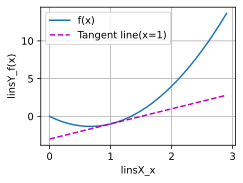

In [202]:
x =np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'linsX_x','linsY_f(x)',legend=['f(x)','Tangent line(x=1)'])

## 亚导数
就是不可导的地方，找个东西代替

比如y=|x|在x=0处不可导，在x=0导数就让他等于a,然后a可以取[-1,1]之间任意的数
$$\frac{\partial|x|}{\partial x}=\left\{\begin{array}{ll}
1 & \text { if } x>0 \\
-1 & \text { if } x<0 \\
a & \text { if } x=0, \quad a \in[-1,1]
\end{array}\right.$$

再比如y=max(x,0)，在x=0处，也等于a，a可以取[0,1]之间任意数
$$\frac{\partial}{\partial x}=\left\{\begin{array}{ll}
1 & \text { if } x>0 \\
0 & \text { if } x<0 \\
a & \text { if } x=0, \quad a \in[0,1]
\end{array}\right.$$

### 梯度(导数扩展到向量)
我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度<u>**向量**</u>

具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。



#### 雅可比矩阵(Jacobian matrix)
跟梯度看起来一样，不过他是矩阵，梯度是向量

也是所有一阶偏导数组成的

$y=f(x)$ y与x都是向量时，雅可比矩阵(Jacobian matrix)为

$J=\left(\begin{array}{ccc}\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\ \vdots & \ddots & \vdots \\ \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}\end{array}\right)$

$y=f(x)$ y为标量与x是向量时，雅可比矩阵(Jacobian matrix)为一维的

$J=\left(\begin{array}{lll}\frac{\partial y}{\partial x_{1}} & \cdots & \frac{\partial y}{\partial x_{m}}\end{array}\right)$

### 练习

求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

即分别每个自变量的偏导数，组成一个向量即可

$\frac{\delta f}{\delta x_{1}}=6 x_{1}$ , $\frac{\delta f}{\delta x_{2}}=5e^{x_2}$

则$\frac{\delta f}{\delta x}=\left(6 x_{1}, 5 e^{x_{2}}\right)$

## 亚导数
就是不可导的地方，找个东西代替

比如y=|x|在x=0处不可导，在x=0导数就让他等于a,然后a可以取[-1,1]之间任意的数
$$\frac{\partial|x|}{\partial x}=\left\{\begin{array}{ll}
1 & \text { if } x>0 \\
-1 & \text { if } x<0 \\
a & \text { if } x=0, \quad a \in[-1,1]
\end{array}\right.$$

再比如y=max(x,0)，在x=0处，也等于a，a可以取[0,1]之间任意数
$$\frac{\partial}{\partial x}=\left\{\begin{array}{ll}
1 & \text { if } x>0 \\
0 & \text { if } x<0 \\
a & \text { if } x=0, \quad a \in[0,1]
\end{array}\right.$$

### 矩阵计算

李沐讲的太短了，听不懂的。

矩阵求导的本质与分子布局、分母布局的本质（矩阵求导——本质篇）：https://zhuanlan.zhihu.com/p/263777564

矩阵求导公式的数学推导（矩阵求导——基础篇）：https://zhuanlan.zhihu.com/p/273729929

矩阵求导公式的数学推导（矩阵求导——进阶篇）：https://zhuanlan.zhihu.com/p/288541909



# 自动求导
PyTorch提供的$autograd$包能够根据输⼊和前向传播过程⾃动构建**计算图**，并执⾏反向传播。

(**假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导**)。
首先，我们创建变量`x`并为其分配一个初始值。

并且声明backward()时需要对x求梯度

In [230]:
x = torch.arange(4.0,requires_grad=True)
x,x.grad # 默认值是None


(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [231]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

y.backward()进行反向传播

In [232]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

正常函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于$\mathbf{x}$的梯度应为$4\mathbf{x}$。


In [233]:
x.grad == 4*x

tensor([True, True, True, True])

默认情况下pytorch会累积梯度，所以再次计算梯度时需要清楚之前的值

In [235]:
x.grad.zero_() # 梯度清零
# 换一个y的函数看看
y = x.sum() # 求和 ，y是一个标量了
# 但计算图还在，对x求导还是可以的
y.backward()
x.grad,x.sum() # 结果会与下面的不一样，因为y的函数表达式不一样

(tensor([1., 1., 1., 1.]), tensor(6., grad_fn=<SumBackward0>))

### 非标量变量的反向传播
当`y`不是标量时，向量`y`关于向量`x`的导数的最自然解释是一个矩阵。
对于高阶和高维的`y`和`x`，求导的结果可以是一个高阶张量。

但当y是向量或矩阵时，再加上网络多层的叠加，计算量会爆炸。

当然理论上也是可以的，但需要自己找办法实现
pytorch也没有支持，当y不是标量时会报错。

通过y.sum()将y转换为标量。然后再对x求导。



In [236]:
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
# 通过y.sum()将y转换为标量。
# 然后再对x求导。 x²的导数是2x ，因为计算图还在
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

将某些计算移动到记录的计算图之外

某些情况下会需要

In [237]:
x.grad.zero_()
y = x * x
# u不是x的函数，所以z对x求导的时候，u看作常数
u = y.detach() # u是y的副本，但是计算图已经被丢弃了
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [238]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 即使构建函数的计算图需要通过python控制流，我们仍然可以计算得到变量的梯度

Python控制流（例如，条件、循环或任意函数调用）

In [239]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [260]:
a =torch.randn(3,requires_grad=True)
d = f(a) # 函数最终为 f(a)=k*a ,k是某个常量，所以梯度（导数）为d/a
d.sum().backward()
#d.backward() #报错，Trying to backward through the graph a second time
a.grad

tensor([1024., 1024., 1024.])

In [242]:
a.grad==d/a

tensor(True)

#### 练习

2.在运行反向传播函数之后，立即再次运行它，看看会发生什么。

报错：Trying to backward through the graph a second time

In [266]:
a =torch.randn(size=(),requires_grad=True)
d = f(a) # 函数最终为 f(a)=k*a ,k是某个常量，所以梯度（导数）为d/a
d.backward()
#d.backward() #报错，Trying to backward through the graph a second time
a.grad

tensor(409600.)

3.把a变成矩阵/向量，会发生什么？

也会报错，不能直接反向传播

要`d.sum().backward()`

In [264]:
# 随机生成一个a
# torch.randn就是生成随机数的函数，size是其第一个参数
# 这里指定size=() ,即指定size为空元组，表示生成一个标量
a =torch.randn(size=(),requires_grad=True)
print(a)

# 不加size也可以
a =torch.randn((),requires_grad=True)
print(a)

# 生成一个形状为 (3, 4) 的随机张量
a = torch.randn(size=(3, 4))
print(a)
# 生成列表
a =torch.randn(3,requires_grad=True)
print(a)

tensor(-1.3301, requires_grad=True)
tensor(-0.4756, requires_grad=True)
tensor([[ 0.0808,  1.3532,  1.3845,  0.5473],
        [ 0.4318, -0.5792,  0.0093,  1.4463],
        [ 0.2392,  0.3775, -0.1730, -0.6949]])
tensor([1.0933, 2.2052, 1.5617], requires_grad=True)


5.使$f(x)=\sin(x)$，绘制$f(x)$和$\frac{df(x)}{dx}$的图像，其中后者不使用$f'(x)=\cos(x)$。


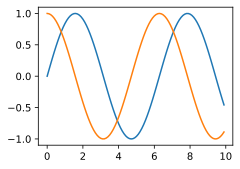

In [277]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
# Only Tensors of floating point and complex dtype can require gradients
# 只有浮点数和复数类型的张量才能需要梯度
x=torch.arange(0.0,10.0,0.1,requires_grad=True,dtype=torch.float32)

# 在绘制图像时，Matplotlib 会尝试将 tensor 转换为 NumPy 数组
# 正常的tensor没问题，但是带梯度的tensor会报错
# 这里x，y都带
 
# 去掉梯度，用来画图
x1 = x.detach()
y1=torch.sin(x1)
# 用来求梯度的不能传入plt.plot
y2=torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
# 由于x.grad张量需要梯度，因此会出现错误。
plt.plot(x1,x.grad)

# 概率
- **概率给了我们一种正式的途径来说明我们的确定性水平。**

  - 如果我们完全肯定图像是一只猫，我们说标签$y$是"猫"的*概率*，表示为$P(y=$"猫"$)$等于$1$。

  - 如果我们不十分确定图像描绘的是一只猫，我们可以将概率赋值为$0.5<P(y=$"猫"$)<1$。

###  大数定律（law of large numbers）： 
- def:  指在随机试验中，每次出现的结果不同，但是大量重复试验出现的结果的平均值却几乎总是接近于某个确定的值。

- 样本数量越多，则其算术平均值就有越高的概率接近期望值。

### Sampling(抽样) && 分布(distribution)
- 在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。

 - 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 

- 将概率分配给一些**离散**选择的分布称为多项分布（multinomial distribution）。